# Read in data and have a look

In [2]:
import pandas as pd
ts_mask = pd.read_csv("day_approach_maskedID_timeseries.csv")
week = pd.read_csv("week_approach_maskedID_timeseries.csv")

In [3]:
ts_mask.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [9]:
week.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


How are we going to make this usable for a ML algorithm?
The question we are trying to answer is: can we predict whether an athlete is going to get injured ahead of time?

In [4]:
by_athlete = week.groupby(['Athlete ID']).mean()
by_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 71 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   74 non-null     float64
 1   nr. rest days                                  74 non-null     float64
 2   total kms                                      74 non-null     float64
 3   max km one day                                 74 non-null     float64
 4   total km Z3-Z4-Z5-T1-T2                        74 non-null     float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    74 non-null     float64
 6   nr. days with interval session                 74 non-null     float64
 7   total km Z3-4                                  74 non-null     float64
 8   max km Z3-4 one day                            74 non-null     float64
 9   total km Z5-T1-T2                              74 non-null   

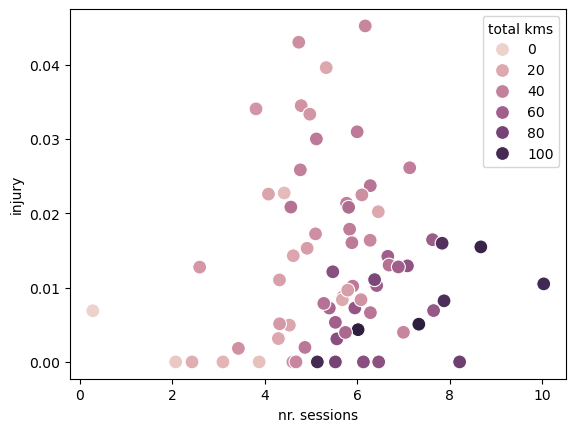

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=by_athlete, x='nr. sessions', y='injury', hue='total kms', s=100) # s sets marker size
plt.show()

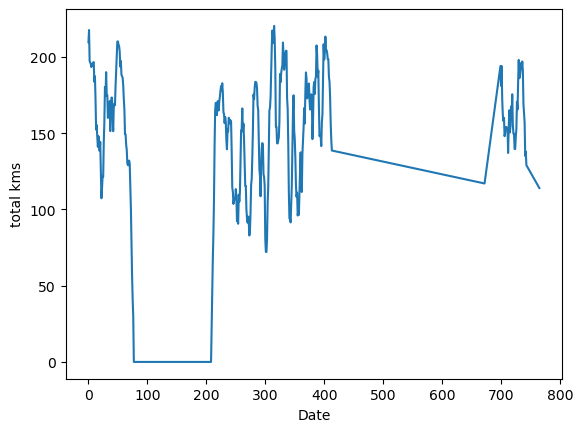

In [8]:
# let's get the weekly mileage for athletes 1
week_subset = week[week['Athlete ID'] == 1]

sns.lineplot(data=week_subset, x='Date', y='total kms')
plt.show()

This data doesn't make a heap of sense, this athlete has gone from over 200km per week, to zero then straight back to ~175

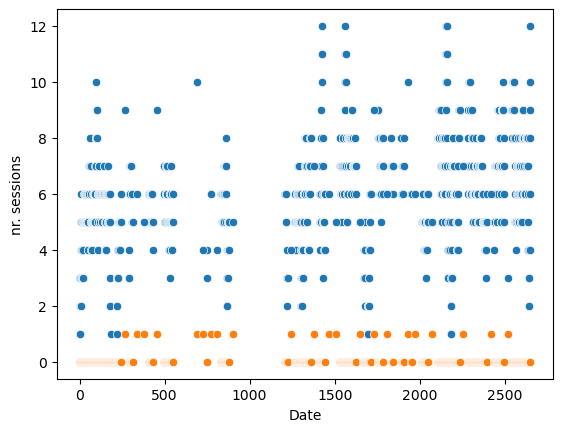

In [28]:
week_subset = week[week['Athlete ID'] == 9]

sns.scatterplot(data=week_subset, x='Date', y='nr. sessions')
sns.scatterplot(data=week_subset, x='Date', y='injury')
plt.show()

# What data can be picked out that is relevant?

Break up the data into 4 week blocks (typical mesocycle time). Then predict whether an injury will occur in the next 4 weeks. We have to modify the data because often no-data for training is reported when actually an injury has occurred. So we need to backfill the missing data.

Explanatory variables:
1. 'nr. sessions'
2. 'nr. rest days'
...
